In [1]:
import os
import json
import pandas as pd
import glob
import numpy as np

In [2]:
data_dir_path = os.path.join(os.getcwd(), r"C:\Users\prava\Downloads\odms_json")

In [3]:
print(data_dir_path)

C:\Users\prava\Downloads\odms_json


In [4]:
json_files = glob.glob(data_dir_path + "/*.json")

In [5]:
dataset_list = []
for json_file in json_files[:3]:
    try:
        with open(json_file, 'r') as json_file:
            data = json.load(json_file)
            df = pd.json_normalize(data)
            dataset_list.append(df)
    except Exception as e:
        print(f"Error reading {json_file}: {e}")

In [6]:
df_combined = pd.concat(dataset_list)

In [7]:
df_combined

,innings,meta.data_version,meta.created,meta.revision,info.balls_per_over,info.city,info.dates,info.event.match_number,info.event.name,info.gender,...,info.registry.people.R Rijal,info.registry.people.RE van der Merwe,info.registry.people.S Lamichhane,info.registry.people.S Vesawkar,info.registry.people.SJ Myburgh,info.registry.people.Sagar Pun,info.registry.people.Sompal Kami,info.registry.people.T van der Gugten,info.registry.people.TGJ Gruijters,info.registry.people.W Barresi
0,"[{'team': 'Namibia', 'overs': [{'over': 0, 'de...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'team': 'Namibia', 'overs': [{'over': 0, 'de...",1.0.0,2016-10-24,1,6,Port Moresby,[2016-10-23],30,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'team': 'Nepal', 'overs': [{'over': 0, 'deli...",1.0.0,2016-08-20,1,6,Amstelveen,[2016-08-13],25,ICC World Cricket League Championship,male,...,ee3ad356,05c2ca46,b410bd3d,3de06845,18261c22,3c4007d3,1adb8ee8,d99cc23a,20f4a109,0d677597


In [8]:
df_combined = df_combined.explode('innings', ignore_index= True)

In [9]:
df_combined

,innings,meta.data_version,meta.created,meta.revision,info.balls_per_over,info.city,info.dates,info.event.match_number,info.event.name,info.gender,...,info.registry.people.R Rijal,info.registry.people.RE van der Merwe,info.registry.people.S Lamichhane,info.registry.people.S Vesawkar,info.registry.people.SJ Myburgh,info.registry.people.Sagar Pun,info.registry.people.Sompal Kami,info.registry.people.T van der Gugten,info.registry.people.TGJ Gruijters,info.registry.people.W Barresi
0,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'team': 'Papua New Guinea', 'overs': [{'over'...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-24,1,6,Port Moresby,[2016-10-23],30,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'team': 'Papua New Guinea', 'overs': [{'over'...",1.0.0,2016-10-24,1,6,Port Moresby,[2016-10-23],30,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'team': 'Nepal', 'overs': [{'over': 0, 'deliv...",1.0.0,2016-08-20,1,6,Amstelveen,[2016-08-13],25,ICC World Cricket League Championship,male,...,ee3ad356,05c2ca46,b410bd3d,3de06845,18261c22,3c4007d3,1adb8ee8,d99cc23a,20f4a109,0d677597
5,"{'team': 'Netherlands', 'overs': [{'over': 0, ...",1.0.0,2016-08-20,1,6,Amstelveen,[2016-08-13],25,ICC World Cricket League Championship,male,...,ee3ad356,05c2ca46,b410bd3d,3de06845,18261c22,3c4007d3,1adb8ee8,d99cc23a,20f4a109,0d677597


In [10]:
df_combined["team"] = df_combined["innings"].apply(lambda x: x.get("team"))

In [11]:
df_combined['overs_list'] = df_combined['innings'].apply(lambda x: x.get('overs'))

In [12]:
df_combined = df_combined.explode('overs_list', ignore_index= True)

In [13]:
df_combined.head()

,innings,meta.data_version,meta.created,meta.revision,info.balls_per_over,info.city,info.dates,info.event.match_number,info.event.name,info.gender,...,info.registry.people.S Lamichhane,info.registry.people.S Vesawkar,info.registry.people.SJ Myburgh,info.registry.people.Sagar Pun,info.registry.people.Sompal Kami,info.registry.people.T van der Gugten,info.registry.people.TGJ Gruijters,info.registry.people.W Barresi,team,overs_list
0,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar..."
1,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Namibia,"{'over': 1, 'deliveries': [{'batter': 'SJ Baar..."
2,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Namibia,"{'over': 2, 'deliveries': [{'batter': 'W van V..."
3,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Namibia,"{'over': 3, 'deliveries': [{'batter': 'W van V..."
4,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Namibia,"{'over': 4, 'deliveries': [{'batter': 'SJ Baar..."


In [14]:
df_combined['over'] = df_combined['overs_list'].apply(lambda x : x.get('over'))

In [15]:
df_combined['deliveries_list'] = df_combined['overs_list'].apply(lambda x : x.get('deliveries'))

In [16]:
df_combined = df_combined.explode('deliveries_list', ignore_index= True)

In [17]:
df_combined.head(2)

,innings,meta.data_version,meta.created,meta.revision,info.balls_per_over,info.city,info.dates,info.event.match_number,info.event.name,info.gender,...,info.registry.people.SJ Myburgh,info.registry.people.Sagar Pun,info.registry.people.Sompal Kami,info.registry.people.T van der Gugten,info.registry.people.TGJ Gruijters,info.registry.people.W Barresi,team,overs_list,over,deliveries_list
0,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '..."
1,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,NaN,NaN,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '..."


In [18]:
df_combined['batter'] = df_combined['deliveries_list'].apply(lambda x : x.get('batter'))

In [19]:
df_combined = df_combined.explode('batter', ignore_index= True)

In [20]:
df_combined['bowler'] = df_combined['deliveries_list'].apply(lambda x : x.get('bowler'))

In [21]:
df_combined = df_combined.explode('bowler', ignore_index= True)

In [22]:
df_combined.head(2)

,innings,meta.data_version,meta.created,meta.revision,info.balls_per_over,info.city,info.dates,info.event.match_number,info.event.name,info.gender,...,info.registry.people.Sompal Kami,info.registry.people.T van der Gugten,info.registry.people.TGJ Gruijters,info.registry.people.W Barresi,team,overs_list,over,deliveries_list,batter,bowler
0,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
1,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,NaN,NaN,NaN,NaN,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper


In [23]:
df_combined.columns

Index(['innings', 'meta.data_version', 'meta.created', 'meta.revision',
       'info.balls_per_over', 'info.city', 'info.dates',
       'info.event.match_number', 'info.event.name', 'info.gender',
       'info.match_type', 'info.missing', 'info.officials.match_referees',
       'info.officials.reserve_umpires', 'info.officials.umpires',
       'info.outcome.by.wickets', 'info.outcome.winner', 'info.overs',
       'info.players.Namibia', 'info.players.Papua New Guinea',
       'info.registry.people.A Kapa', 'info.registry.people.A Vala',
       'info.registry.people.BM Scholtz', 'info.registry.people.C Peake',
       'info.registry.people.CA Soper', 'info.registry.people.CG Williams',
       'info.registry.people.CM Brown', 'info.registry.people.D Bau',
       'info.registry.people.G Snyman', 'info.registry.people.JB Reva',
       'info.registry.people.JJ Smit', 'info.registry.people.JN Frylinck',
       'info.registry.people.JP Kotze', 'info.registry.people.L Oala',
       'info.regist

 ## Data Cleaning

In [24]:
df_combined.isna().sum()

innings                0
meta.data_version      0
meta.created           0
meta.revision          0
info.balls_per_over    0
                      ..
overs_list             0
over                   0
deliveries_list        0
batter                 0
bowler                 0
Length: 87, dtype: int64

In [25]:
df_combined.fillna(0, inplace =True)

In [26]:
df_combined.columns.str.lower().str.replace(' ','_')

Index(['innings', 'meta.data_version', 'meta.created', 'meta.revision',
       'info.balls_per_over', 'info.city', 'info.dates',
       'info.event.match_number', 'info.event.name', 'info.gender',
       'info.match_type', 'info.missing', 'info.officials.match_referees',
       'info.officials.reserve_umpires', 'info.officials.umpires',
       'info.outcome.by.wickets', 'info.outcome.winner', 'info.overs',
       'info.players.namibia', 'info.players.papua_new_guinea',
       'info.registry.people.a_kapa', 'info.registry.people.a_vala',
       'info.registry.people.bm_scholtz', 'info.registry.people.c_peake',
       'info.registry.people.ca_soper', 'info.registry.people.cg_williams',
       'info.registry.people.cm_brown', 'info.registry.people.d_bau',
       'info.registry.people.g_snyman', 'info.registry.people.jb_reva',
       'info.registry.people.jj_smit', 'info.registry.people.jn_frylinck',
       'info.registry.people.jp_kotze', 'info.registry.people.l_oala',
       'info.regist

In [27]:
df_combined.columns = df_combined.columns.str.lower().str.replace('.', '_', regex=False)
df_combined

,innings,meta_data_version,meta_created,meta_revision,info_balls_per_over,info_city,info_dates,info_event_match_number,info_event_name,info_gender,...,info_registry_people_sompal kami,info_registry_people_t van der gugten,info_registry_people_tgj gruijters,info_registry_people_w barresi,team,overs_list,over,deliveries_list,batter,bowler
0,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
1,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
2,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
3,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
4,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,"{'team': 'Netherlands', 'overs': [{'over': 0, ...",1.0.0,2016-08-20,1,6,Amstelveen,[2016-08-13],25,ICC World Cricket League Championship,male,...,1adb8ee8,d99cc23a,20f4a109,0d677597,Netherlands,"{'over': 16, 'deliveries': [{'batter': 'RE van...",16,"{'batter': 'RE van der Merwe', 'bowler': 'S La...",RE van der Merwe,S Lamichhane
1538,"{'team': 'Netherlands', 'overs': [{'over': 0, ...",1.0.0,2016-08-20,1,6,Amstelveen,[2016-08-13],25,ICC World Cricket League Championship,male,...,1adb8ee8,d99cc23a,20f4a109,0d677597,Netherlands,"{'over': 16, 'deliveries': [{'batter': 'RE van...",16,"{'batter': 'RE van der Merwe', 'bowler': 'S La...",RE van der Merwe,S Lamichhane
1539,"{'team': 'Netherlands', 'overs': [{'over': 0, ...",1.0.0,2016-08-20,1,6,Amstelveen,[2016-08-13],25,ICC World Cricket League Championship,male,...,1adb8ee8,d99cc23a,20f4a109,0d677597,Netherlands,"{'over': 16, 'deliveries': [{'batter': 'RE van...",16,"{'batter': 'SJ Myburgh', 'bowler': 'S Lamichha...",SJ Myburgh,S Lamichhane
1540,"{'team': 'Netherlands', 'overs': [{'over': 0, ...",1.0.0,2016-08-20,1,6,Amstelveen,[2016-08-13],25,ICC World Cricket League Championship,male,...,1adb8ee8,d99cc23a,20f4a109,0d677597,Netherlands,"{'over': 16, 'deliveries': [{'batter': 'RE van...",16,"{'batter': 'SJ Myburgh', 'bowler': 'S Lamichha...",SJ Myburgh,S Lamichhane


In [28]:
df_combined['over'] = df_combined['over'].astype('int')

In [29]:
df_combined.head()

,innings,meta_data_version,meta_created,meta_revision,info_balls_per_over,info_city,info_dates,info_event_match_number,info_event_name,info_gender,...,info_registry_people_sompal kami,info_registry_people_t van der gugten,info_registry_people_tgj gruijters,info_registry_people_w barresi,team,overs_list,over,deliveries_list,batter,bowler
0,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
1,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
2,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
3,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
4,"{'team': 'Namibia', 'overs': [{'over': 0, 'del...",1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper


In [30]:
#Create innings number
df_combined['innings'] = np.where(df_combined['innings'].isnull(),1, 2)

In [31]:
df_combined.head()

,innings,meta_data_version,meta_created,meta_revision,info_balls_per_over,info_city,info_dates,info_event_match_number,info_event_name,info_gender,...,info_registry_people_sompal kami,info_registry_people_t van der gugten,info_registry_people_tgj gruijters,info_registry_people_w barresi,team,overs_list,over,deliveries_list,batter,bowler
0,2,1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
1,2,1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
2,2,1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
3,2,1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper
4,2,1.0.0,2016-10-21,1,6,Port Moresby,[2016-10-21],29,ICC World Cricket League Championship,male,...,0,0,0,0,Namibia,"{'over': 0, 'deliveries': [{'batter': 'SJ Baar...",0,"{'batter': 'SJ Baard', 'bowler': 'CA Soper', '...",SJ Baard,CA Soper


In [43]:
df_balls = df_combined.groupby('team')[['deliveries_list']].count()
df_balls

,deliveries_list
team,
Namibia,619
Nepal,234
Netherlands,103
Papua New Guinea,586


In [60]:
deliveries = df_combined['deliveries_list']

In [62]:
# Total runs
runs = 0
for delivery in df_combined["deliveries_list"]:
  runs += delivery["runs"]["batter"]

print("Total Runs:", runs)

Total Runs: 1094


In [63]:
# Strike rate
balls_faced = len(df_combined["deliveries_list"])  
strike_rate = (runs / balls_faced) * 100
print("Strike Rate:", strike_rate)

Strike Rate: 70.94682230869002


In [64]:
# Top bowler
bowlers = {}
for d in df_combined["deliveries_list"]:
  if d["bowler"] in bowlers:
    bowlers[d["bowler"]] += 1
  else:
    bowlers[d["bowler"]] = 1

print("Top bowler:", max(bowlers, key=bowlers.get))

Top bowler: N Vanua


In [66]:
import matplotlib.pyplot as plt

In [68]:
# Parse deliveries 
runs_per_over = []
for over in range(1, 21):
    runs = 0
    balls = 6 * (over - 1)
    for b in range(balls, balls+6):
        runs += df_combined['deliveries_list'][b]['runs']['batter']
    runs_per_over.append(runs)


Text(0.5, 1.0, 'Runs scored per over')

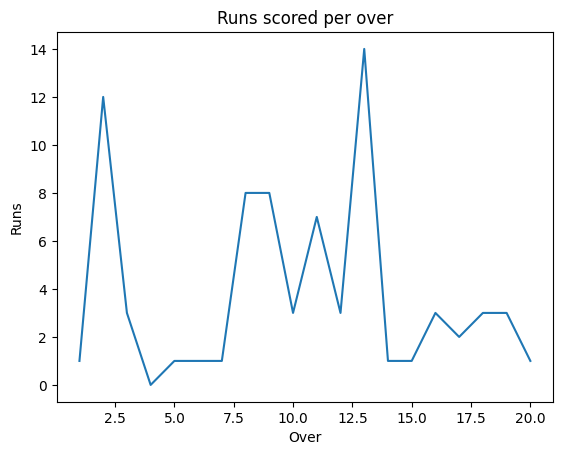

In [69]:
# Plot runs per over  
plt.plot(range(1,21), runs_per_over)
plt.xlabel("Over")
plt.ylabel("Runs")
plt.title("Runs scored per over")

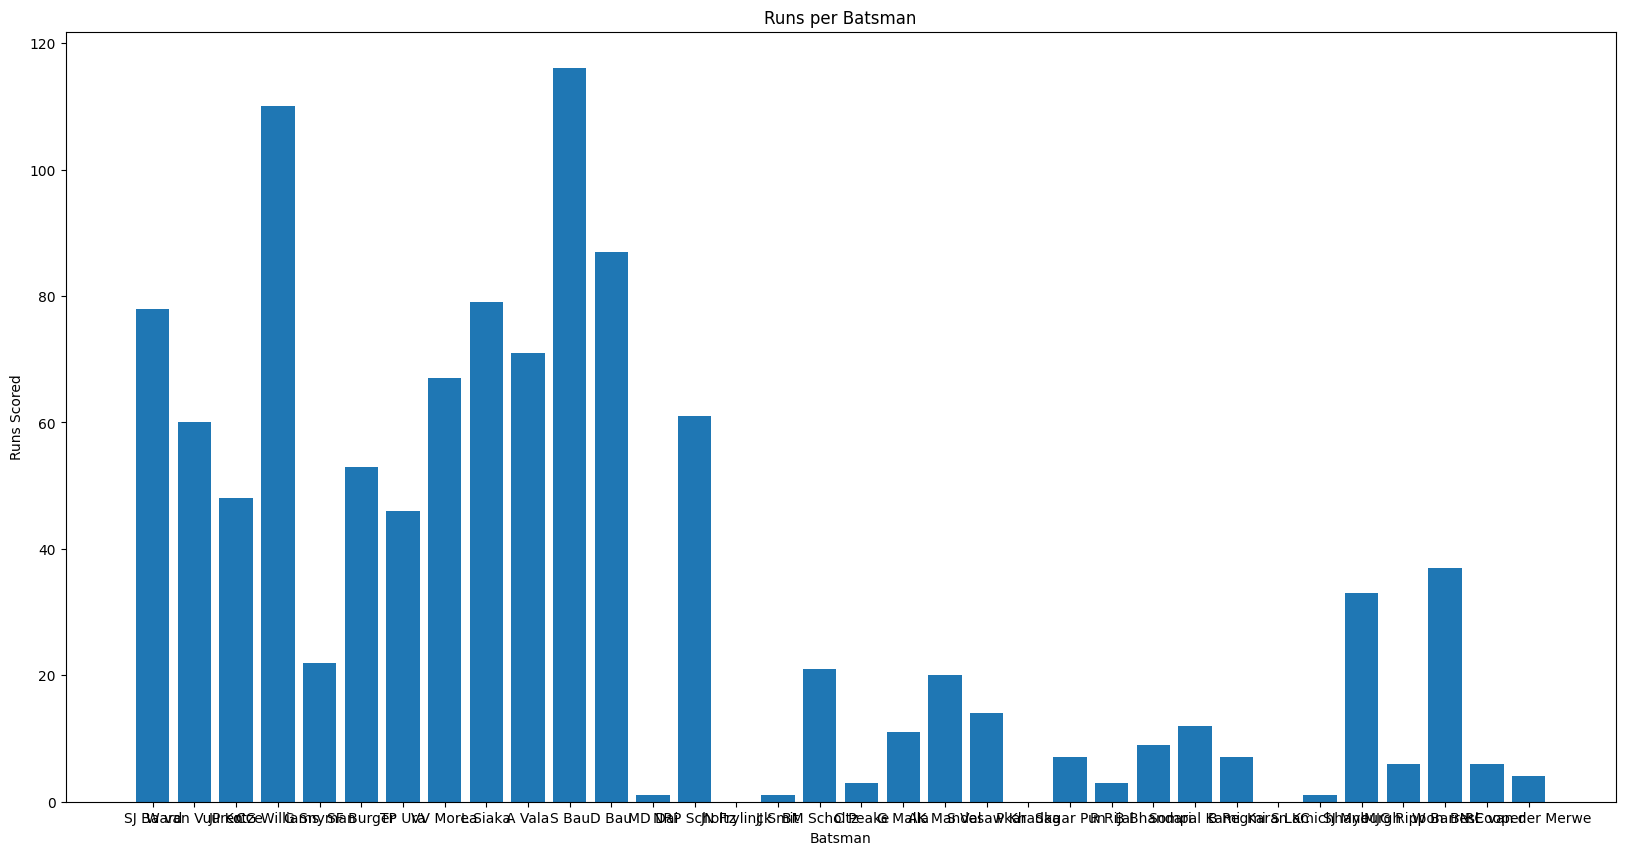

In [83]:
# batsman runs
batsmen_runs = {}
for delivery in df_combined['deliveries_list']:
    batsman = delivery['batter'] 
    runs = delivery['runs']['batter']
    
    if batsman not in batsmen_runs:
        batsmen_runs[batsman] = 0
        
    batsmen_runs[batsman] += runs
    
plt.figure(figsize= (20,10))
bars = plt.bar(batsmen_runs.keys(), batsmen_runs.values())
plt.xlabel("Batsman")
plt.ylabel("Runs Scored")
plt.title("Runs per Batsman")

plt.show()

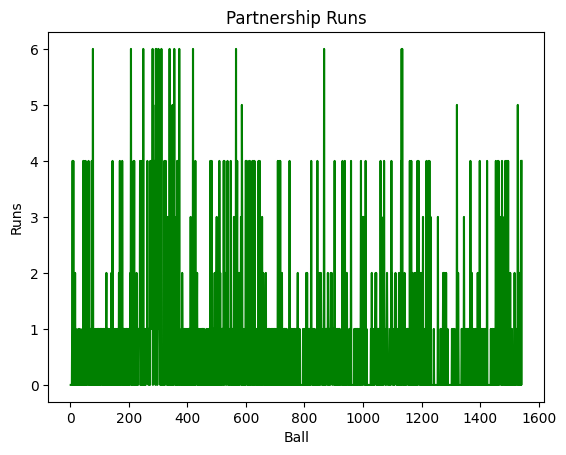

In [85]:
# Partnership over time
ball_num = []
runs = []

for i, d in enumerate(deliveries):
    ball_num.append(i+1)
    runs.append(d['runs']['total'])

plt.plot(ball_num, runs, color="green")
plt.xlabel("Ball")
plt.ylabel("Runs")
plt.title("Partnership Runs")
plt.show()

In [87]:
# Analyze dot balls (0 runs)
dot_balls = 0

for delivery in deliveries:
    if delivery['runs']['total'] == 0:
        dot_balls += 1

total_balls = len(deliveries)  
dot_percentage = dot_balls * 100 / total_balls

print("Dot ball percentage:", dot_percentage)

Dot ball percentage: 55.512321660181584


In [90]:
#Bowling Partnership

bowler_partnership = []

for i in range(0, len(deliveries), 6):
    over = deliveries[i:i+6]  
    bowlers = set([d['bowler'] for d in over])
    bowler_partnership.append(len(bowlers))

print("Avg bowlers per over:", sum(bowler_partnership)/len(bowler_partnership))

Avg bowlers per over: 1.7392996108949417
